# Mental Health in the Tech Industry

This is the notebook for my project for Module 2 (Statistical Inference), Sprint 1. This sprint has primarily focused on SQL skills and an introduction to inference, so I will be focusing on these skills. 

## Contents

* [Purpose](#purpose)
* [Summary](#summary)
* [Setup](#setup)
* [Features](#features)
* [Analysis](#analysis)
    1. [Who responded to this survey? Are the respondents representative of the wider population?](#q1)
        1. [Age](#q1-1)
        1. [Gender](#q1-2)
    1. [How many respondents have experienced mental health disorders?](#q2)
        1. [All Respondents](#q2-1)
        1. [Age](#q2-2)
        1. [Gender](#q2-3)
    1. [Which mental health disorders had the highest prevalence rate?](#q3)
        1. [All Respondents](#q3-1)
        1. [Age](#q3-2)
        1. [Gender](#32-3)
* [Conclusion](#conclusion)
* [Improvements and Further Analysis](#improvements)

## Purpose<a name="purpose"></a>

Below are the questions I am seeking to answer with this analysis. First, I am going to investigate who responded to the surveys, focusing on age and gender, and see if this changed between 2014 and 2019. Then I am going to investigate the prevalence of mental health disorders, looking first at how many respondents reported having any mental health disorder and investigating if this changed between 2014 and 2019, then focusing on the prevalence of the 4 most common mental health disorders, using the data available in the 2016 survey. I will be analysing these first across all respondents, then seeing if the rate of mental health disorders and the prevalence of the 4 most common disorders is different between different age groups and gender. 

The results of this analysis should provide employers detail on: how wide spread mental health disorders are in the tech industry and whether this changed between 2014 and 2019; which mental disorder are most prevalent; and whether different genders are experience mental health disorders at different rates. The purpose of this analysis is to provide employers more information about how common mental health issues are in the tech workforce and to highlight which groups suffer from these disorders more, in order to help employers focus their mental health support on the disorders and individuals who need more help. 

The questions I will attempt to answer are:
1. [Who responded to this survey? Are the respondents representative of the wider population?](#q1)
    1. [Age](#q1-1)
    1. [Gender](#q1-2)
1. [How many respondents have experienced mental health disorders?](#q2)
    1. [All Respondents](#q2-1)
    1. [Age](#q2-2)
    1. [Gender](#q2-3)
1. [Which mental health disorders had the highest prevalence rate?](#q3)
    1. [All Respondents](#q3-1)
    1. [Age](#q3-2)
    1. [Gender](#32-3)

## Summary<a name="summary"></a>

The analysis of this dataset suggests that mental health disorders are common in the tech industry, with at least 62% of respondents in each survey reporting that they have experienced at least one mental health disorder. The highest rate was in 2014, at nearly 80%, although due to the nature of this data, this may be more inaccurate than the subsequent years. In the other four surveys, the rate of mental disorders stayed relatively consistent, hovering between 62% and 65%. The most prevalent disorders where mood disorders (44%), anxiety disorders (38%), ADHD (13%) and addictive disorders (9%). Employers could benefit from focusing their mental health information and services on these disorders, especially mood and anxiety disorders, as these are quite common and often related to work.

When considering rates of mental health disorders across different age groups, there is a little variation, although all confidence intervals overlap, suggesting there may not be a significant difference. The oldest group (over 55s) appear to be the most vulnerable to mental disorders. The distribution of the 4 most prevalent disorders is reasonably flat across the groups, although over 55s appear to suffer from mood disorders more often and the rates of mood disorders appear to increase as people age. It may be beneficial for employers to focus on older individuals, although it is difficult to say whether this data is accurate or not - some individuals may have chosen not to report their disorders, so some groups may be underrepresented.

The rates of mental health disorders across different genders, however, differ significantly. Female and TGNB workers are more likely to experience mental health disorders at higher rate than male workers. The rates of mental disorders in TGNB individuals appears to have decreased over the years, although it is still likely higher than the rates in men, but the rates in women have stayed relatively consistent (after an initial drop in 2016). There is also a significant difference in the prevalence of the 4 most common disorders, which female and TGNB worker experiencing mood and anxiety disorders at much higher rates than men - of particular concern is the fact that TGNB individuals experience mood disorder at twice the rate of men, at 80%, and anxiety disorders at nearly twice, at 60%. ADHD and addictive disorders have a much flatter distribution, with the groups experiencing these at similar rates. As with age, it is difficult to say if this data is fully accurate - men may experience mental health disorders at higher rates but are more reluctant to report it - however it may be beneficial for employers to investigate why women and TGNB individuals have elevated rates and whether they are able to focus some of their mental resources of these groups. 

## Setup<a name="setup"></a>

I will be using the [Mental Health in the Tech Industry](https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry) dataset from Kaggle. Here, I'll import the packages and functions I'll be using and connect to the SQL database.

In [33]:
# importing the packages I'll use
import warnings
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
#import importlib
from scipy import stats

# importing my functions and SQL queries
import functions as fnc
import queries as qry

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# connecting to database
con = sql.connect('mental_health.sqlite')
cursor = con.cursor()


## Features<a name="features"></a>

In this section, I am going to briefly look at the data available and select the questions I will focus on. 

In [34]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", con)
tables

,name
0,Answer
1,Question
2,Survey


In [35]:
col_names = {}

for index, table in tables.iterrows():
    output = cursor.execute(f"SELECT * FROM {table.values[0]}")
    col_names[table.values[0]] = [item[0] for item in output.description]
    
col_names

{'Answer': ['AnswerText', 'SurveyID', 'UserID', 'QuestionID'],
 'Question': ['questiontext', 'questionid'],
 'Survey': ['SurveyID', 'Description']}

There are 3 tables included in this database: Answer, Question, and Survey. 

Survey contains the ID of each survey (SurveyID) and a short description on the survey (Description).

In [36]:
surveys = pd.DataFrame(cursor.execute("SELECT * FROM Survey").fetchall(), columns=col_names['Survey'])
surveys.head()

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


This dataset contains the results of 5 surveys, taken between 2014 and 2019 (a survey was run every year except 2015). The ID is the year of the survey.

Question contains an ID for each question (questionid) and the question asked (questiontext).

In [37]:
questions = pd.DataFrame(cursor.execute("SELECT * FROM Question").fetchall(), columns=col_names['Question'])
len(questions)

105

In [38]:
questions.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


105 different questions were asked across the 5 surveys (questions are used in multiple surveys) and collected sociodemographic data and health data (including both mental and physical health, with a focus on mental) about the respondent, as well as data about their place of work (including their current employer and previous employers, where applicable) and how their place of work and clients (where applicable) reacted to any health conditions they had/have.

Of these 105 questions, I will be focusing on:

In [39]:
pd.DataFrame(cursor.execute(qry.question_list).fetchall(), columns=['ID','Question']).set_index('ID')

,Question
ID,
1,What is your age?
2,What is your gender?
33,Do you currently have a mental health disorder?
115,"If yes, what condition(s) have you been diagno..."
116,"If maybe, what condition(s) do you believe you..."


Answer contains all available questions responses from all 5 surveys for all respondents. Each answer contains the foreign key for both the survey (SurveyID) and the question (questionID), as well as an ID for the respondent (UserID) and the answer they gave for that question (AnswerText). A respondent will answer multiple questions and will have a row for each question answered. 

In [40]:
answers = pd.DataFrame(cursor.execute("SELECT * FROM Answer").fetchall(), columns=col_names['Answer'])
answers.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [41]:
print(f'Number of missing Survey IDs in Answer: {answers.SurveyID.isna().sum()}')
print(f'Number of missing User IDs in Answer: {answers.UserID.isna().sum()}')
print(f'Number of missing Questions in Answer: {answers.QuestionID.isna().sum()}')
print(f'Number of missing Answers in Answer: {answers.AnswerText.isna().sum()}')

Number of missing Survey IDs in Answer: 0
Number of missing User IDs in Answer: 0
Number of missing Questions in Answer: 0
Number of missing Answers in Answer: 0


In [42]:
print(f'All Surveys in Answer present in Survey: {answers.SurveyID.unique().sort() == surveys.SurveyID.unique().sort()}')
print(f'All Questions in Answer present in Question: {answers.QuestionID.unique().sort() == questions.questionid.unique().sort()}')

All Surveys in Answer present in Survey: True
All Questions in Answer present in Question: True


In [43]:
print(f'Number of answers provided: {len(answers)}')
print(f'Number of answers where respondent refused to give a response: {len(answers[answers.AnswerText == '-1'])} ({len(answers[answers.AnswerText == '-1'])/len(answers):.0%})')

Number of answers provided: 236898
Number of answers where respondent refused to give a response: 56598 (24%)


The Answer table is not missing any survey IDs, user IDs, questions or answers, and the survey IDs and questions are all expected (that is, exist in the Survey and Question tables). Overall, 236898 answers were given across 5 surveys. 56598 (24%) were the respondent refusing to give an answer (which is indicated by an answer of '-1') - this will be removed from any analysis.

Due to the size of the dataset and the fact that I am only focusing on 4 questions, I will focus on the data quality when I first analyse a question. 

## Analysis<a name="analysis"></a>



### Question 1: Who responded to this survey? Are the respondents representative of the wider population?<a name="q1"></a>


First, I am going to quickly look at the total number of respondents per survey, then I am going to look at the age groups and genders of respondents per survey.

In [44]:
respondent_num = pd.DataFrame(cursor.execute("SELECT SurveyID, COUNT(DISTINCT(UserID)) FROM Answer GROUP BY SurveyID").fetchall(), columns=['Survey','Respondents']).set_index('Survey')
print(f'Total number of respondents: {respondent_num.sum()['Respondents']}')

Total number of respondents: 4218


Overall, there were 4218 responses to all 5 surveys.

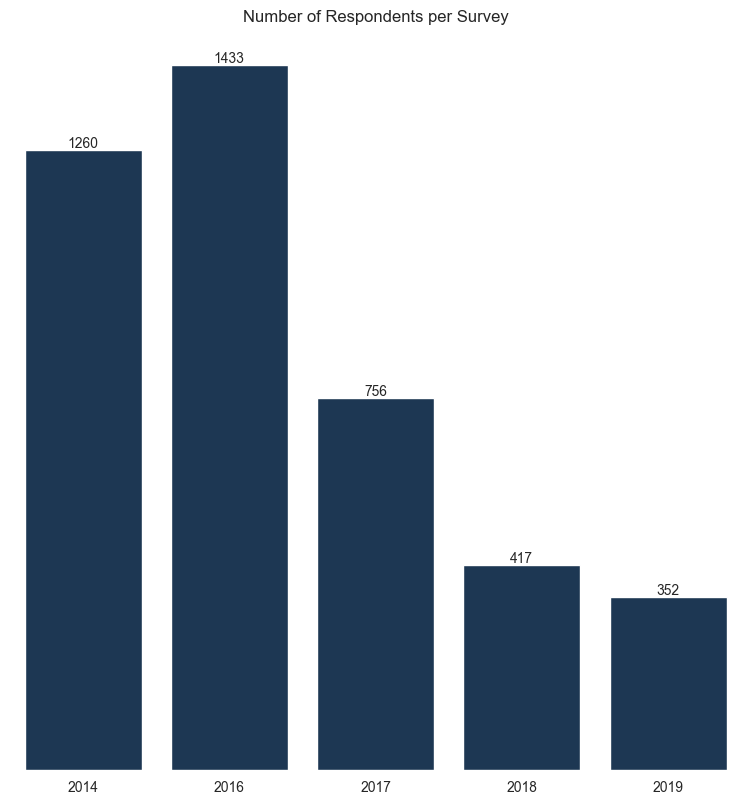

In [45]:
fnc.barplot_all_years(respondent_num,'Survey','Respondents','#14375C')
sns.set_style('whitegrid');

The first two surveys had the highest response rates, with the 2016 survey having the highest at 1433 (13% higher than 2014). However, after 2016, response rate decline significantly, with the next survey, in 2017, having only slightly more than half the respondent (53%). By the final survey, response rate is only 25% of the 2016 response rate. Due to the decreasing response rate, any inference made from the later surveys will be less precise and less likely to reflect to population as a whole, so should be used more carefully.

#### Age<a name="q1-1"></a>

Age was recorded in each survey, under question ID 1, 'What is your age?'. This was asked in each survey.

In [46]:
pd.DataFrame(cursor.execute(qry.age_1).fetchall())

,0,1
0,18-25,541
1,26-35,2144
2,36-45,1162
3,46-55,284
4,56-65,64
5,66-75,7
6,Over 75,3
7,Under 18,13


The vast majority of respondents fall between 18 and 67 years old, which is the typical working age range in most countries (with the age of majority/adulthood being around 18 in most countries, and retirement typically being in the 60s). The highest retirement age is 67, so I will be making this the upper age limit and make the oldest age group 'Over 55'. There is some variety in the youngest working age, so I will check these respondents directly to see if these are valid. 

In [47]:
pd.DataFrame(cursor.execute(qry.age_2).fetchall(), columns=['Country','Age'])

,Country,Age
0,Brazil,17
1,Canada,15
2,United States,11
3,"Bahamas, The",8
4,United States,5
5,Canada,3


I have excluded all obviously invalid (anything 0 or less) and non-responses (-1, which would technically fall in the Under 18 group). Of the remaining young responses, the only 2 legal ages are the 17 year old in Brazil (minimum working age of 16) and the 15 year old in Canada (minimum working age of 15). The rest can be discarded, making the lower age limit 15. I will include them in the youngest group and change this name to 'Under 25'. 

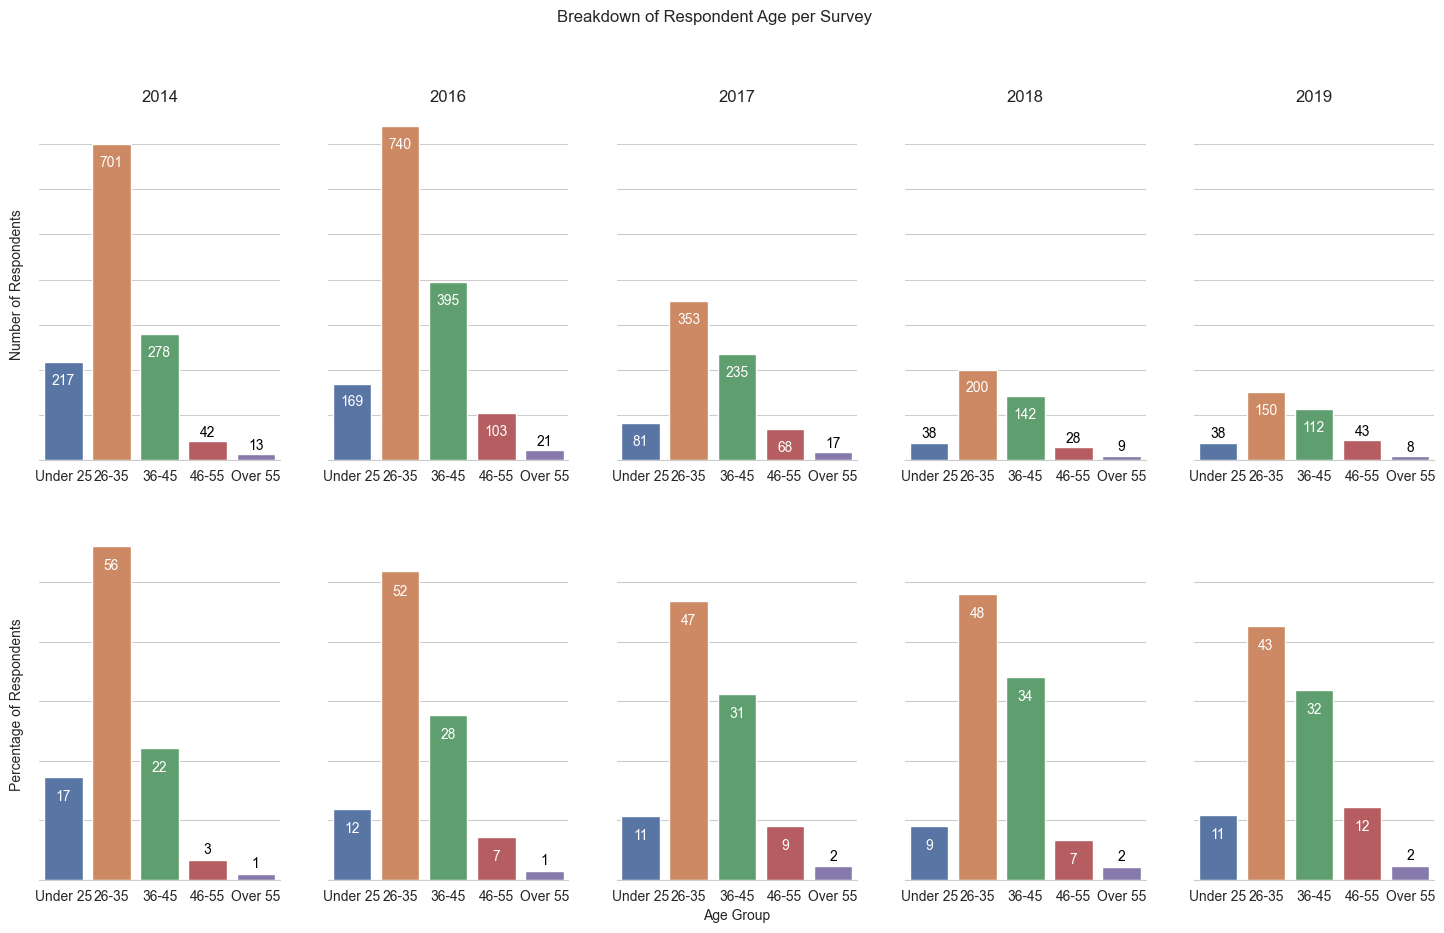

In [48]:
age_groups = pd.DataFrame(cursor.execute(qry.age_3).fetchall(), columns=['survey','age','number'])
age_groups = fnc.percents(age_groups,'number','percentage')
fnc.barplot_per_year_vals_pers(age_groups,x='age',y=['number','percentage'],years=age_groups.survey.unique(),
                               xlabel='Age Group',title='Breakdown of Respondent Age per Survey',
                               topylabel='Number of Respondents',bottomylabel='Percentage of Respondents')
sns.set_style('whitegrid');

In the above charts, the age demographics of each survey are shown in both actual number of respondents, and as a proportion of each survey, to allow for direct comparison between the surveys. The overall distribution of age is consistent across the surveys - there is a strong skew towards lower age groups, with the majority of respondents falling into the 26-35 age group. There is a steep decline into older groups, especially in the earlier surveys, with the oldest two age groups typically making up around 10% of respondents, with 14% at the most and only 4% at the least. These groups do generally represent a larger proportion of each survey as the years progress, suggesting that either the surveys are recording the industry age, or that older individuals are beginning to feel more comfortable reporting on their mental health, or even that the tech industry is becoming a more appealing option to those making a career change later in life.

Looking at the youngest 3 age groups, both the Under 25 and 26-35 age groups shrink year on year, by about 6% and 13% respectively, whereas the 36-45 group increase by 10% over all. The majority of respondents fall into either the 26-35 or 36-45 age groups (75+%), and the Under 25 group is the third largest group every year except 2019 (where the 46-55 group was 1% larger), suggesting that the tech industry is more attractive to younger people and perhaps easier to join for these individuals. The youngest age group, however, is decreasing over the years, which could suggest that the tech industry is more appealing to those making a career change slightly later in life (30s and older), rather than to those who have recently finished their education (20s), or that the middle age groups are more comfortable discussing their mental health than either the youngest or oldest age groups.

In order to get a sense of how well this distributions represents the general population, I am going to first check what countries the majority of respondents are from and then briefly compare the [population pyramids](www.populationpyramid.net). 

In [49]:
pd.DataFrame(cursor.execute(qry.top_10_countries).fetchall())

,0,1
0,America,2604
1,United Kingdom,482
2,Canada,199
3,Germany,136
4,Netherlands,98
5,Australia,73
6,Ireland,51
7,France,51
8,India,50
9,Brazil,37


The majority of respondents are from North America or Europe. Looking at the population pyramids for both [North America](https://www.populationpyramid.net/northern-america/2014/) and [Europe](https://www.populationpyramid.net/europe/2014/), it's clear that the tech industry is not representative of the population overall. While there is some variation for each age group on these population pyramids, the proportion of the population in each age between 20 and 64 is relatively flat, especially in Europe, which means that the number of individuals in each age group should be reasonably similar and not exhibit the significant skew shown above. This means that any inference made from this data may not accurately reflect the boarder population and should be considered when using any analysis to draw conclusions. 

#### Gender<a name="q1-2"></a>

Gender was recorded in each survey, under question ID 2, 'What is your gender?'. This was asked in each survey.

In [50]:
genders = pd.DataFrame(cursor.execute(qry.gender_1).fetchall(), columns=['survey','gender','number'])
genders

,survey,gender,number
0,2014,male,991
1,2014,female,247
2,2014,female (trans),2
3,2014,trans-female,1
4,2014,trans woman,1
...,...,...,...
119,2019,femmina,1
120,2019,female-identified,1
121,2019,cishet male,1
122,2019,agender trans woman,1


Above is every answer provided for gender, with number of respondents per gender for each survey. It is apparent from this summary that many genders are represented in this dataset.

In [51]:
print(f'Number of responses: {genders.number.sum()}')
print(f'Number of responses that are male or female: {genders[(genders.gender == "male") | (genders.gender == "female")].number.sum()}')
print(f'Number of responses that are not male or female: {genders[(genders.gender != "male") & (genders.gender != "female")].number.sum()}')
print(f'Number of these that are non-responses: {genders[genders.gender == "-1"].number.sum()}')

Number of responses: 4218
Number of responses that are male or female: 4067
Number of responses that are not male or female: 151
Number of these that are non-responses: 24


The majority of respondents selected 'male' or 'female' (96.4%), with only a small number selecting something else (3.6%). 24 of those refused to answer (0.5%), so these can be removed, leaving 127 transgender and gender non-binary (TGNB) responses (3.0%).

In [52]:
np.sort(genders[(genders.gender != 'male') & (genders.gender != 'female') & (genders.gender != '-1')].gender.unique())

array(['43', '\\-', 'a little about you', 'afab', 'agender',
       'agender trans woman', 'agender/genderfluid', 'all', 'androgyne',
       'androgynous', 'bigender', 'cishet male', 'contextual', 'demiguy',
       'enby', 'female (trans)', 'female assigned at birth',
       'female or multi-gender femme',
       'female-bodied; no feelings about gender', 'female-identified',
       'female-ish', 'female/gender non-binary.', 'femmina', 'fluid',
       'fm', 'gender non-conforming woman', 'genderfluid',
       'genderfluid (born female)', 'genderflux demi-girl', 'genderqueer',
       'genderqueer demigirl', 'genderqueer woman',
       'genderqueer/non-binary', 'god king of the valajar',
       'guy (-ish) ^_^', 'human', 'i am a wookie', 'i have a penis',
       'male (or female, or both)', 'male (trans, ftm)',
       'male 9:1 female, roughly', 'male leaning androgynous', 'male-ish',
       'male/androgynous', 'male/genderqueer', 'masculine', 'masculino',
       'mtf', 'nah', 'nb', 'nb 

Of these other selections, the vast majority appear to be valid responses (e.g. 'nonbinary', 'agender'). Some appear to be invalid/incorrect (e.g. '43', '\\\\-'), so can be discarded. Of the rest, it seems likely that some would be best included under 'male' or 'female', but, given the small number of respondents selecting them (typically only 1 per response) and the uncertainty of whether the respondent intended to be classed this way or not, it seems best to consider anything not 'male', 'female' or an obviously invalid response as 'TGNB'.

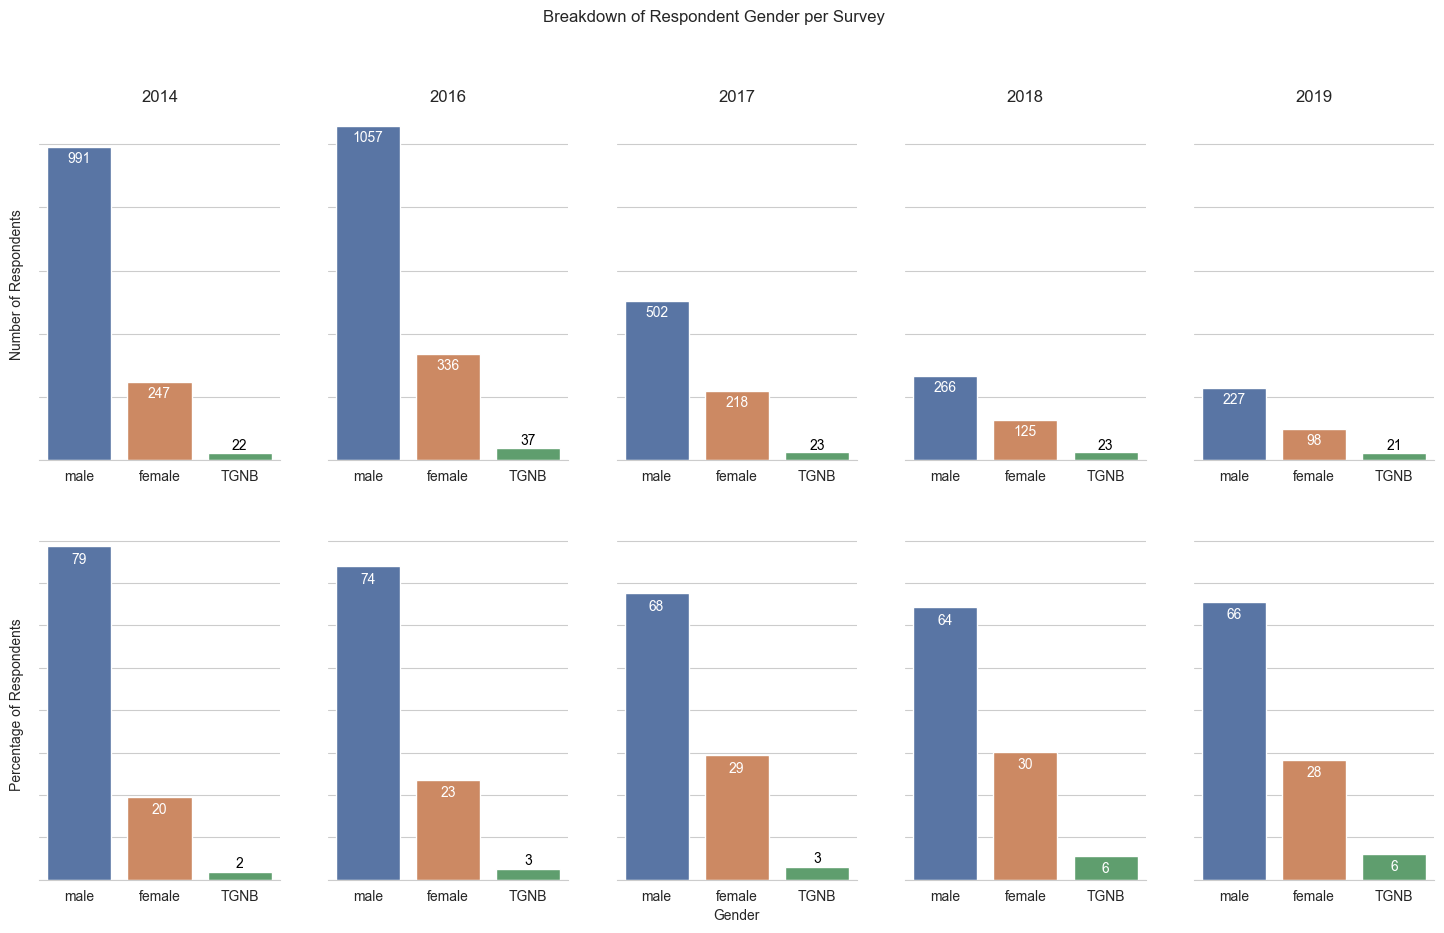

In [53]:
genders = pd.DataFrame(cursor.execute(qry.gender_2).fetchall(), columns=['survey','gender','number'])
genders = fnc.percents(genders,'number','percentage')
fnc.barplot_per_year_vals_pers(genders,x='gender',y=['number','percentage'],years=genders.survey.unique(),
                               xlabel='Gender',title='Breakdown of Respondent Gender per Survey',
                               topylabel='Number of Respondents',bottomylabel='Percentage of Respondents')
sns.set_style('whitegrid');

In [54]:
genders_vals = genders.pivot(index='survey', columns='gender', values='number')
genders_vals = genders_vals[['female','male','TGNB']]
genders_percentage = genders.pivot(index='survey', columns='gender', values='percentage')
genders_percentage = genders_percentage[['female','male','TGNB']]


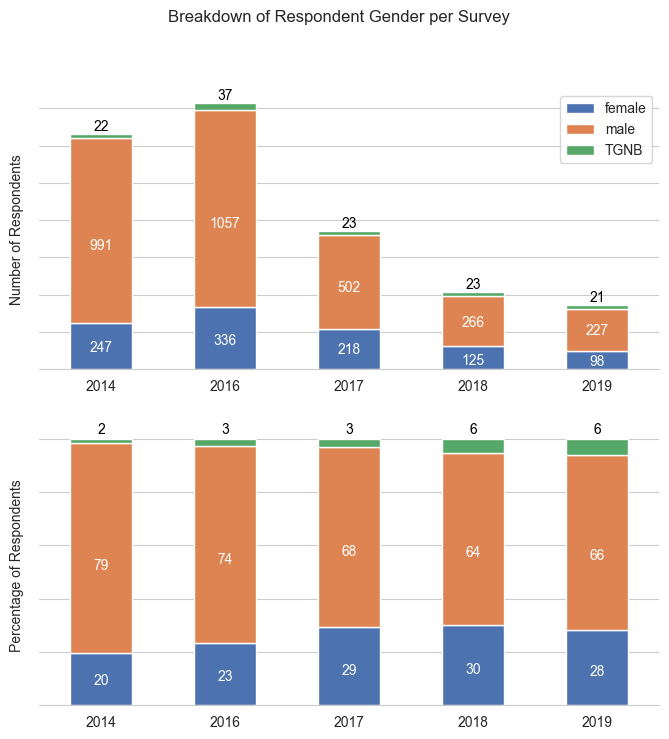

In [55]:
fnc.stack_barplots(genders_vals,genders_percentage,'Breakdown of Respondent Gender per Survey')
sns.set_style('whitegrid');

From the above charts, it's apparent that the respondents to this survey are not representative of the general population. The male/female split should be roughly 50%, however, in every survey, men make up substantially more than half of respondents and women substantially less. The proportion of women increases over the years but is always less than half the proportion of men.

The bias towards male respondents is particularly apparent when looking at the proportion of genders per survey. Men always make at least 64% of respondents, and nearly 80% at the highest. The proportion of women increases over the surveys, peaking in 2018 (although the decrease in 2019 is minor), suggesting that more women have entered the tech industry, although this may be stabilising now, and/or that the women working in tech are becoming more comfortable reporting on their mental health.

TGNB respondents also increased each year of the survey, suggesting it's also becoming common for TGNB individuals to work in the tech industry and/or those individuals are more comfortable reporting on their mental health. Estimates of TGNB individuals in the general population range from less than 0.5% to slightly less than 3%, increasing year on year. The percentage of TGNB respondents has always been significantly more than the lowest estimates, and at its highest (in 2019), is twice that of the highest estimates (6%), suggesting that the tech industry is attractive to individuals from this specific minority. 

To summarise this analysis, the gender demographics tech industry in the tech industry are not representative of the general population, which should be considered when reviewing the results of this analysis. There is significant under representation of women and significant over representation of men and TGNB individuals, although the representation of women does appear to be increasing. This bias mean that it is likely that this analysis will not accurately reflect the boarder population.

### Question 2: How many respondents have experienced mental health disorders?<a name="q2"></a>

For this question, I am going to focus question ID 33, 'Do you currently have a mental health disorder?'. This question was asked in 2016, 2017, 2018 and 2019 and will allow me to analyse the prevalence of mental health disorder at the time of each survey. This question was not asked in 2014. The answers to question ID 92, 'If you have a mental health condition, do you feel that it interferes with your work?', can be used to infer how many respondents have mental health disorders. As this question is specific to those with a mental health condition, any answer should indicate the presence of an active mental health disorder, giving a reasonable estimate of the prevalence in 2014. This will not be completely accurate, as some individuals without mental health disorders may still have answered 'No', so it's likely this will be a higher than the actual value.

The 2017 to 2019 surveys had 4 options: Yes (indicating that the respondent has a mental health disorder), No (indicating that the respondent does not have a mental health disorder), Maybe/Possibly (which I have combined into one group, indicating that the respondent may have a mental health disorder), Don't Know (indicating that the respondent does not know if they have a mental health disorder). The 2016 survey did not include Don't Know, and the 2014 did not include Don't Know or Maybe.

I have used the Wald method to calculate my confidence intervals.<a name="q2-1"></a>

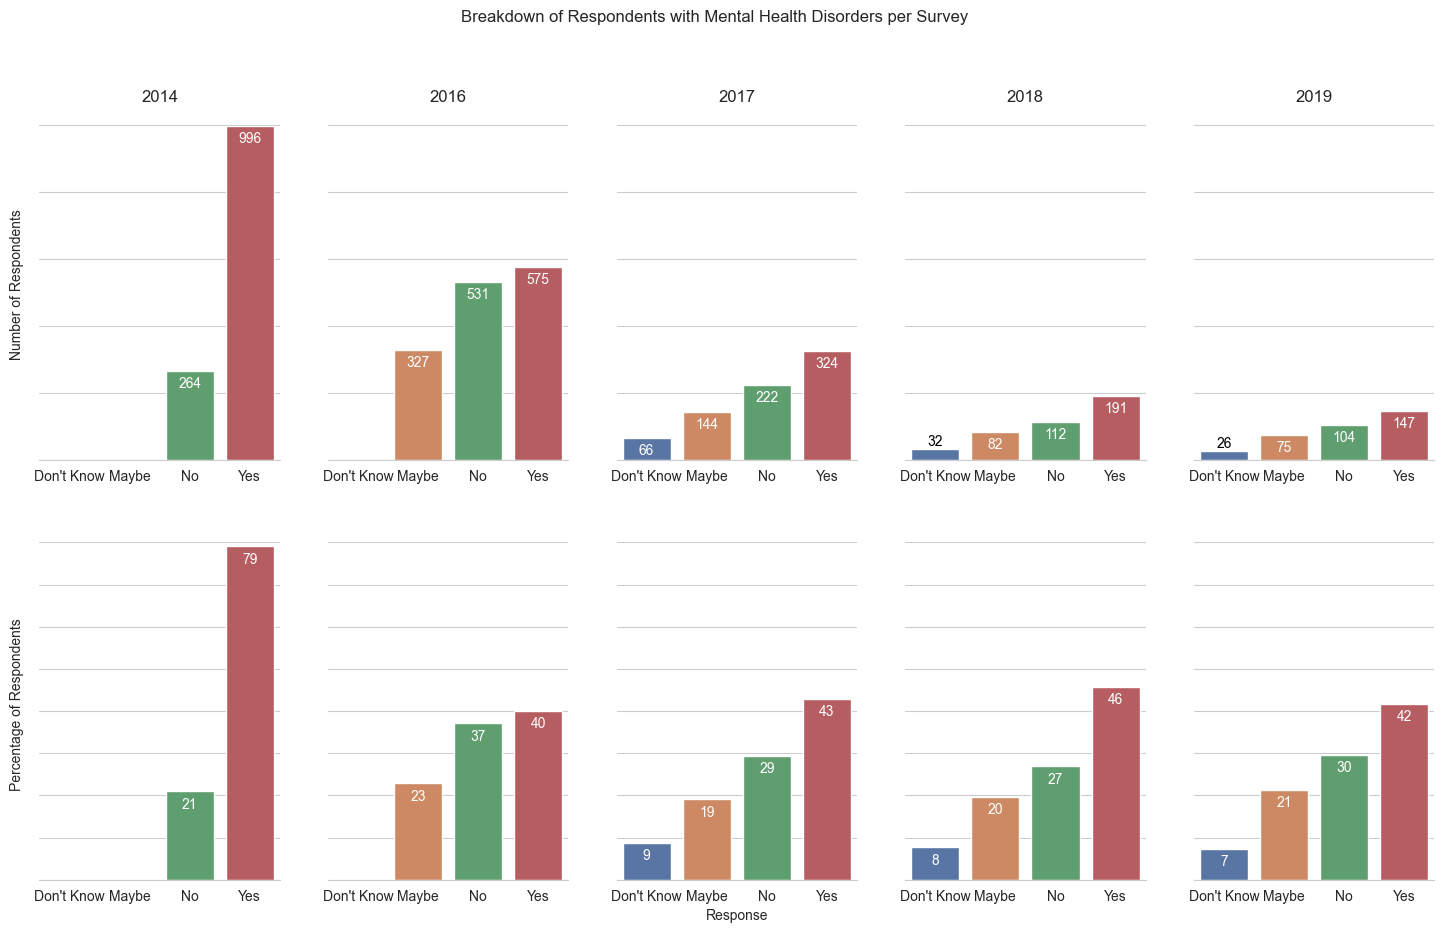

In [56]:
curr_diagnosed = pd.DataFrame(cursor.execute(qry.num_mental_disorders_16_19).fetchall(),columns=['survey','response','number'])
curr_diagnosed_2014 = pd.DataFrame(cursor.execute(qry.num_mental_disorders_14).fetchall(),columns=['survey','response','number'])

curr_diagnosed = pd.concat([curr_diagnosed_2014,curr_diagnosed,
                            pd.DataFrame([[2014,"Don't Know",0],[2014,"Maybe",0],[2016,"Don't Know",0]],
                                         columns=['survey','response','number'])]).sort_values(by=['survey','number']).reset_index().drop('index',axis=1)
curr_diagnosed = fnc.percents(curr_diagnosed,'number','percentage')

fnc.barplot_per_year_vals_pers(curr_diagnosed,x='response',y=['number','percentage'],years=curr_diagnosed.survey.unique(),
                               xlabel='Response',title='Breakdown of Respondents with Mental Health Disorders per Survey',
                               topylabel='Number of Respondents',bottomylabel='Percentage of Respondents')
sns.set_style('whitegrid');

These surveys suggest that the rate of mental illness and suspected mental illness is high in the tech industry. In every survey, respondents were most likely to report having a mental health disorder (40% or more), and around 20% more respondents suspected they had a mental health disorder. 

The first survey has substantially higher rates of mental health disorders, which is feature of all subsequent analysis - this may be due to the fact that respondents were not asked directly about whether they have a mental health disorder and I have had to infer the number from another, indirect question, but it may also be a real feature. There may have been improvements in mental health in tech between 2014 and 2016. From 2016 onwards, the rates are a lot more consistent. Further data is needed to determine whether 2014 is a real outlier or not and whether changes were made that improved the situation.

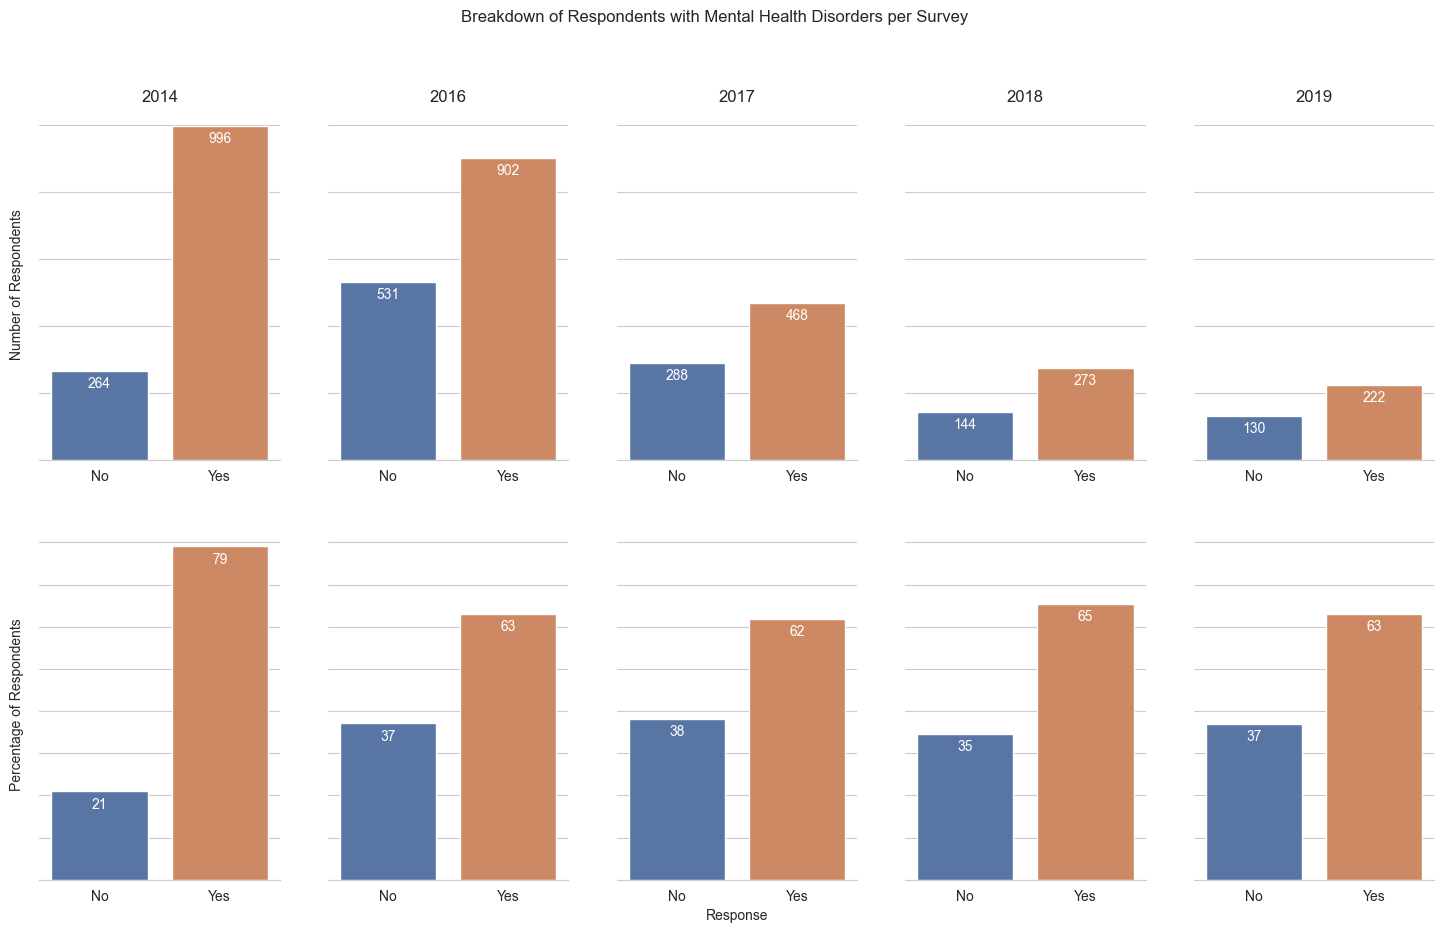

In [57]:
curr_diagnosed_agg = pd.DataFrame(cursor.execute(qry.num_mental_disorders_16_19_agg).fetchall(),columns=['survey','response','number'])
curr_diagnosed_agg = pd.concat([curr_diagnosed_2014,curr_diagnosed_agg]).reset_index().drop('index',axis=1)
curr_diagnosed_agg = fnc.percents(curr_diagnosed_agg,'number','percentage')
fnc.barplot_per_year_vals_pers(curr_diagnosed_agg,x='response',y=['number','percentage'],years=curr_diagnosed_agg.survey.unique(),
                               xlabel='Response',title='Breakdown of Respondents with Mental Health Disorders per Survey',
                               topylabel='Number of Respondents',bottomylabel='Percentage of Respondents')
sns.set_style('whitegrid');

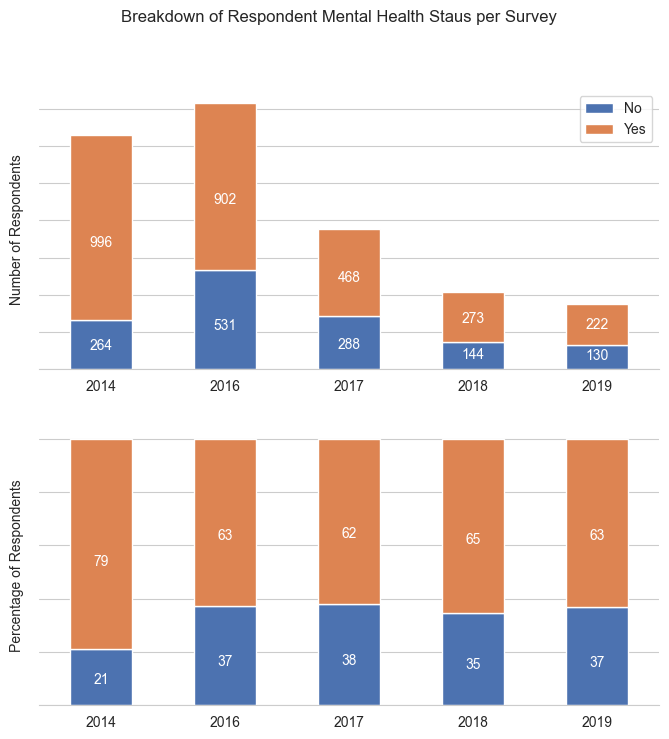

In [58]:
curr_diagnosed_agg_vals = curr_diagnosed_agg.pivot(index='survey', columns='response', values='number')
curr_diagnosed_agg_percents = curr_diagnosed_agg.pivot(index='survey', columns='response', values='percentage')

fnc.stack_barplots(curr_diagnosed_agg_vals,curr_diagnosed_agg_percents,'Breakdown of Respondent Mental Health Staus per Survey')
sns.set_style('whitegrid');

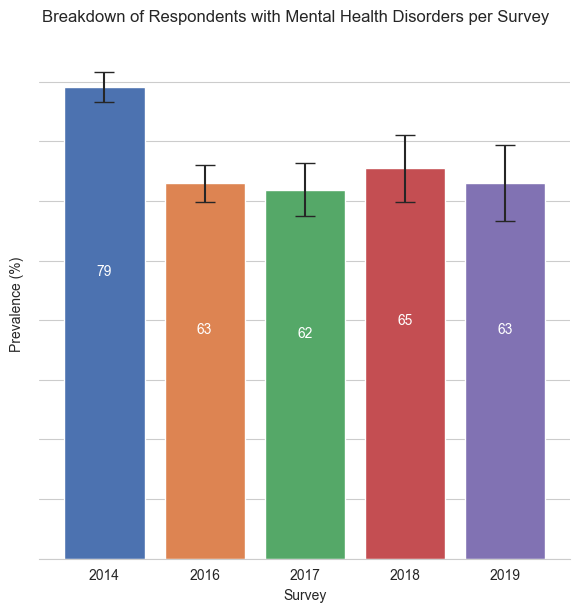

In [59]:
curr_diagnosed_agg_err = fnc.confidence_interval(curr_diagnosed_agg,'percentage',civ=0.95)
fnc.barplot_err(curr_diagnosed_agg[(curr_diagnosed_agg['response'] == 'Yes')],x='survey',y='percentage',
                               title='Breakdown of Respondents with Mental Health Disorders per Survey',yerr='percentage_err',xlabel='Survey', ylabel='Prevalence (%)')

Grouping the data into either having a mental disorder (Yes or Maybe) or not (No or Don't Know) makes the rate of mental illness even more stark - it is possible that over 60% of the tech workforce are experiencing some sort of mental health disorder at any given time. 

The stability of the rate of mental health disorders is more apparent in the prevalence graph - from 2016, the prevalence remains consistent, with only a 3% difference at most, and all of the estimates are within each others confidence intervals. 

As this dataset is not representative of the boarder population and a dataset for the general population is not available, I am not able to say if this is representative of the population as a whole, or if individuals in the tech industry experience mental health disorders at a different rate. Employers should, however, be aware of just how prevalent mental health disorders are - it is important that workers have support available, as the majority (between 60% and 80%) experience some degree of mental health issue.

#### Age<a name="q2-2"></a>

Next, I am going to look at the prevalence of all mental health disorders across the different age groups.

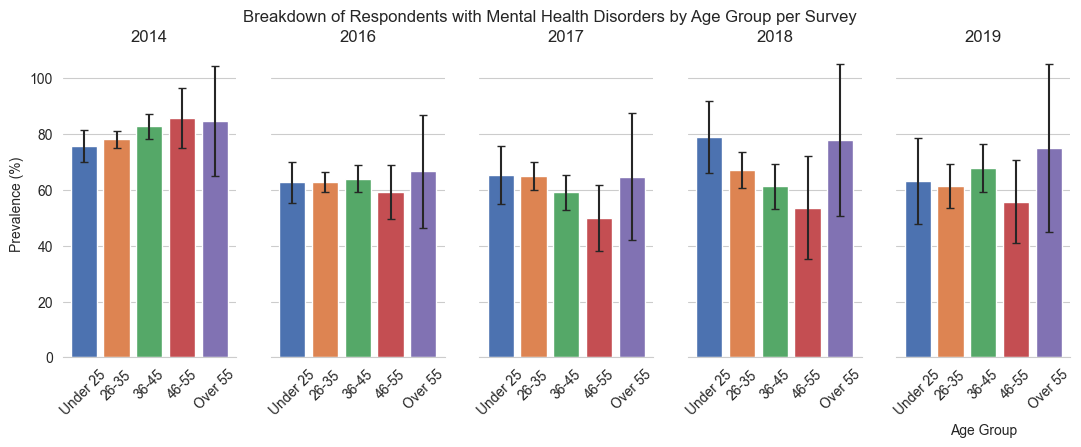

In [60]:
mental_health_by_age = pd.DataFrame(cursor.execute(qry.num_mental_disorders_16_19_agg_age).fetchall(),columns=['survey','age','response','number'])
mental_health_by_age_2014 = pd.DataFrame(cursor.execute(qry.num_mental_disorders_14_age).fetchall(),columns=['survey','age','response','number'])
mental_health_by_age = pd.concat([mental_health_by_age_2014,mental_health_by_age]).reset_index().drop('index',axis=1)
mental_health_by_age = fnc.percents_2_levels(mental_health_by_age,'number','percentage','survey','age',)
mental_health_by_age = fnc.confidence_interval_2_level(mental_health_by_age,'percentage','number','survey','age',civ=0.95)

fnc.barplot_per_year_err(mental_health_by_age[(mental_health_by_age['response'] == 'Yes')],x='age',y='percentage',years=mental_health_by_age.survey.unique(),
                               title='Breakdown of Respondents with Mental Health Disorders by Age Group per Survey',yerr='percentage_err',xlabel='Age Group', ylabel='Prevalence (%)')

The rates of mental health disorders and their distributions across age groups differ across the surveys. In the first two surveys, different age groups experience mental health disorders at very similar rates - all the groups are within about 10% of each other and their confidence intervals overlap. As the years progress, this distribution become less flat, although the changes are not particularly consistent, suggesting there may not be any real correlation between age and mental illness. 

The middle age groups (26-45) appear to have the most consistent rates, with minimal changes across the years. 46-55s appear to have improved their mental health somewhat, although further research would be needed to determine if and why this happened. The most notable increase is in the Over 55s group, which increase by approximately 10% between 2016 and 2018. Under 25s also seem particularly susceptible, also increasing by over 10% in 2018, although this increase is not maintained through 2019.

It's difficult to draw meaningful conclusions for employers from this data - it seems unlikely that age is a strong factor in mental illness in tech workers, although employers may benefit from focusing on their youngest and oldest workers.

#### Gender<a name="q2-3"></a>

Finally, I am going to look at the prevalence of all mental health disorders across the different genders.

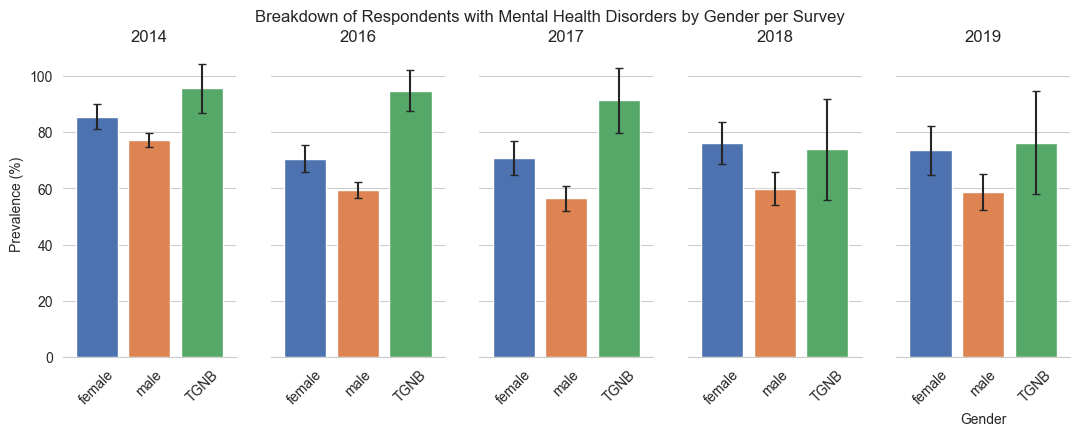

In [61]:
mental_health_by_gender = pd.DataFrame(cursor.execute(qry.num_mental_disorders_16_19_agg_gender).fetchall(),columns=['survey','gender','response','number'])
mental_health_by_gender_2014 = pd.DataFrame(cursor.execute(qry.num_mental_disorders_14_gender).fetchall(),columns=['survey','gender','response','number'])
mental_health_by_gender = pd.concat([mental_health_by_gender_2014,mental_health_by_gender]).reset_index().drop('index',axis=1)
mental_health_by_gender = fnc.percents_2_levels(mental_health_by_gender,'number','percentage','survey','gender')
mental_health_by_gender = fnc.confidence_interval_2_level(mental_health_by_gender,'percentage','number','survey','gender',civ=0.95)

fnc.barplot_per_year_err(mental_health_by_gender[(mental_health_by_gender['response'] == 'Yes')],x='gender',y='percentage',years=mental_health_by_gender.survey.unique(),
                               title='Breakdown of Respondents with Mental Health Disorders by Gender per Survey',yerr='percentage_err',xlabel='Gender', ylabel='Prevalence (%)')

Unlike age, mental illness rates differ significantly in different genders. TGNB individuals are particularly susceptible to mental health disorders, although this appears to be improving over the years. Between 214 and 2017, this group is significantly higher than either males or females, but decreases to match women in 2018 and 2019. Women also report mental health issues at higher rates than men, but the rates of both men and women stay consistent across the surveys, suggesting there may be a correlation between gender and mental health.

Employers should be aware that their female and TGNB are more likely to report that they have mental health disorders and thus should ensure there is sufficient support available for these groups (although men still experience high rates of mental illness, so should also have access to these resources).

Further investigation may reveal why women and TGNB individuals have worse mental health in the tech industry. It's also possible that men actually have similar rates of mental illness but are less likely to report it - this could also benefit from further investigation.

### Question 3: Which mental health disorders had the highest prevalence rate?<a name="q3"></a>

Only the 2016 survey provides data on the mental health disorders experienced by the respondents. I will be using question ID 115, 'If yes, what condition(s) have you been diagnosed with?', and question ID 116, 'If maybe, what condition(s) do you believe you have?'.

I have done some cleaning to group categories of mental health disorders together (e.g. Autism and Asperger's as Autism Spectrum Disorder, ADHD and ADD as ADHD, Mood Disorders, Depression etc. as Mood Disorders, etc.).

<a name="q3-1"></a>

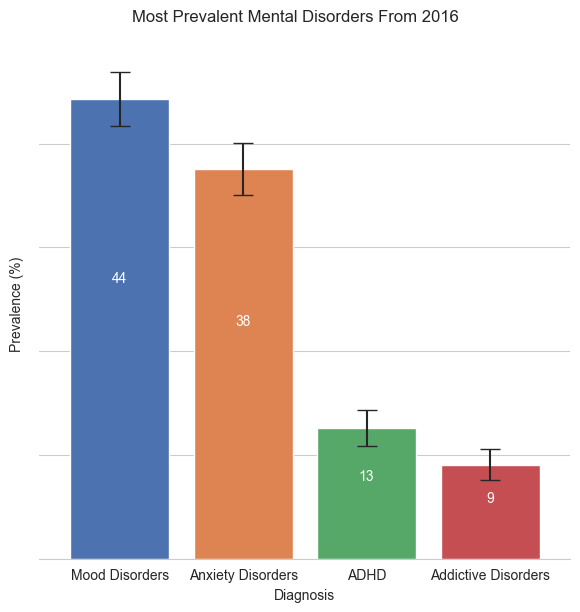

In [62]:
disorders = pd.DataFrame(cursor.execute(qry.top_4_disorders).fetchall(), columns=['survey','diagnosis','number'])
disorders = fnc.percents_disorders(disorders,respondent_num.loc[2016,'Respondents'],'number','percentage')
disorders = fnc.confidence_interval_disorder(disorders,'percentage',respondent_num.loc[2016,'Respondents'],civ=0.95)
fnc.barplot_err(disorders,x='diagnosis',y='percentage',
                               title='Most Prevalent Mental Disorders From 2016',yerr='percentage_err',xlabel='Diagnosis', ylabel='Prevalence (%)')

The 4 most prevalent disorders in 2016 were:
1. Mood disorders (44%)
2. Anxiety disorders (38%)
3. ADHD (13%)
4. Addictive disorders (9%)

In [ ]:
disorders_age = pd.DataFrame(cursor.execute(qry.top_4_disorders_age).fetchall(), columns=['survey','diagnosis','age','number'])
disorders_age = fnc.percents_2_levels_disorders(disorders_age,age_groups[age_groups.survey == 2016],'number','percentage','age')
disorders_age = fnc.confidence_interval_2_level_disorders(disorders_age,'percentage',age_groups[age_groups.survey == 2016],'number','age',civ=0.95)
fnc.barplot_per_diagnosis_err(disorders_age,x='age',y='percentage',diagnosis=disorders_age.diagnosis.unique(),
                               title='Breakdown of Prevalence of the top 4 Mental Disorders by Age per Survey',yerr='percentage_err',xlabel='Age', ylabel='Prevalence (%)')

<a name="q3-2"></a>Overall, the rates of the 4 most prevalent disorders is reasonably consistent across age groups, suggesting this is not a strong factor in individuals mental health. Older individuals do appear to be slightly more likely to be affected by mood disorders and less likely to be affected by addictive disorders, and 46-55 may be less likely to be impacted by anxiety disorders, but there aren't many strong differences between age groups.

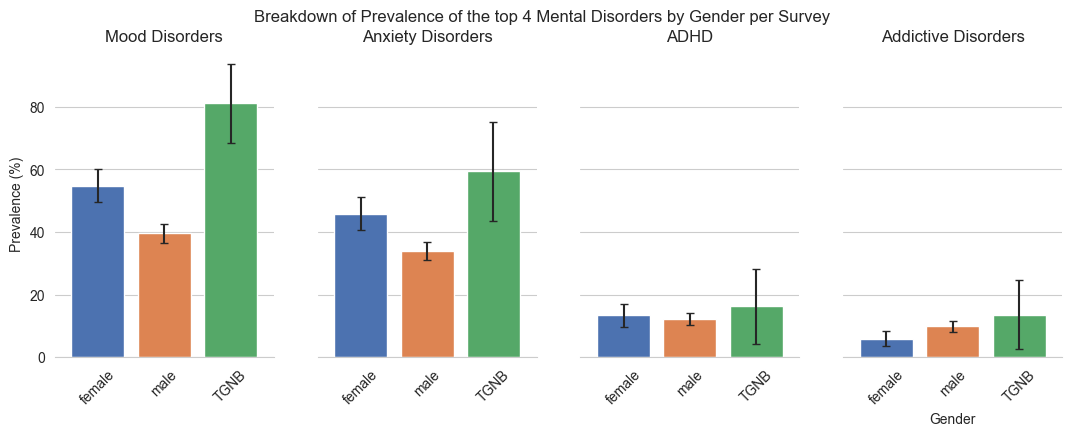

In [32]:
disorders_gender = pd.DataFrame(cursor.execute(qry.top_4_disorders_gender).fetchall(), columns=['survey','diagnosis','gender','number'])
disorders_gender = fnc.percents_2_levels_disorders(disorders_gender,genders[genders.survey == 2016],'number','percentage','gender')
disorders_gender = fnc.confidence_interval_2_level_disorders(disorders_gender,'percentage',genders[genders.survey == 2016],'number','gender',civ=0.95)
fnc.barplot_per_diagnosis_err(disorders_gender,x='gender',y='percentage',diagnosis=disorders_gender.diagnosis.unique(),
                               title='Breakdown of Prevalence of the top 4 Mental Disorders by Gender per Survey',yerr='percentage_err',xlabel='Gender', ylabel='Prevalence (%)')

<a name="q3-3"></a>Looking now at the distribution of the most common mental health disorders across genders, it's apparent that TGNB and women are more suspectable to mood and anxiety disorders than men, with TGNB being the most suspectable. There appears to be no meaningful difference between the rates of ADHD however, and men and TGNB individuals are more suspectable to addictive disorders. This suggest that gender is unlikely to be a strong factor in the likelihood of having ADHD, but may be a strong factor in mood and anxiety disorders. 

## Conclusion<a name="conclusion"></a>

Mental health conditions are common in the tech industry, particularly mood disorders, anxiety disorders, ADHD and addictive disorders. There is significant difference in the rates of mental illness across genders; women and TGNB individuals are particularly susceptible. There does not appear to be a meaningful across age groups, although the youngest and oldest groups may be slightly more susceptible. 

## Further Investigation and Improvements<a name="improvements"></a>

With regards to my personal development, I would like to:
1. Learn to write more efficient and more generalised function - I have several functions that do very similar things, but that I needed to have multiple versions of because I struggled to make one function that was able to adapt to different inputs. I also think I could focus on the efficiency/runtime of these functions, as this is not something I focused on much.
2. Focus on the efficiency of my SQL queries - I think I have done a decent job with my SQL queries, however I didn't consider their efficiency and I would like to focus on this in future projects, so I can gain another skill.
3. Learn how to preform more robust, quantitative statistical analysis and inference - I feel this is a particularly weak skill for me and so I would like to focus on this in future

With regards to how I would like to expand this analysis, I would:
1. Want to work with a proper random sample - surveys are inherently biased methods of collections and are not random, so it's very difficult to make inferences about the boarder population, either within the tech industry or without. It's likely that individuals with mental health issues are more likely to respond to a survey about mental health, so it's quite likely that the prevalence of mental illness has been over-estimated.
2. Want to include a random sample from the boarder population. This is for similar reasons to the above, so I can better determine if the possible correlations and prevalences I've discussed are likely to be accurate to the boarder population.
3. Want to focus on how workers feel about their mental health - this analysis has only really identified which demographic groups are more likely to experience mental health issues, however, it would be useful for employers to also know whether these individuals felt that their issues were impacting their ability to work, if and what treatment they felt helped, and how they felt their employers handled. Employers could use this to guide their policy around mental health more.